# Experiment 1: Topic Classification
## Source Task: yinetal
## Target Task: huffpost

In [1]:
from flair.models.text_classification_model import TARSClassifier
from flair.data import Sentence
import pandas as pd 
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
# GRAKA auswählen
import flair, torch
flair.device = torch.device('cuda:1') 

# Labelbezeichner: Oneword

In [3]:
base_path = '/vol/fob-vol7/nebenf19/samahakk'
#base_path = !pwd
base_path = base_path + '/masterarbeit_experiment2'

In [4]:
# 1. Load Testset
dt = pd.read_csv(base_path + "/topic_huffpost/oneword/dev.csv")
labels = dt["label"]
text = dt["text"]

# 2. Load Model
tars = TARSClassifier.load(base_path + "/topic_yin/model/best-model.pt")

# 3. Run Test
results = []
classes = [
    "travel",
    "technology",
    "wellness",
    "women",
    "parents",
    "business",
    "weddings",
    "fashion",
    "entertainment",
    "science",
    "divorce",
    "crime",
    "religion",
    "sports",
    "politics",
    "comedy",
]

for sentence in text:
    try:
        sequence = Sentence(sentence)
    except:
        sequence = Sentence('test test test')
        
    tars.predict_zero_shot(sequence, classes, multi_label=False)
    print(sequence)
    label = sequence.labels[0].value
    results.append(label)


# 4. Evaluate Results
y_true = labels
y_pred = results

report = classification_report(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
fisher = f1_score(y_true, y_pred, average="weighted")

2021-09-08 15:21:06,120 loading file /vol/fob-vol7/nebenf19/samahakk/masterarbeit_experiment2/topic_yin/model/best-model.pt
init TARS
Sentence: "Bitcoin 's Big Ethereum Problem"   [− Tokens: 5  − Sentence-Labels: {'label': [technology (0.9105)]}]
Sentence: "5 Tips to Boost Native Advertising Effectiveness"   [− Tokens: 7  − Sentence-Labels: {'label': [business (0.9787)]}]
Sentence: "Can Entrepreneurship Be Taught ?"   [− Tokens: 5  − Sentence-Labels: {'label': [business (0.2915)]}]
Sentence: "Go Ahead , Act Like a Guy : Body Language Advice for Women"   [− Tokens: 13  − Sentence-Labels: {'label': [women (0.9284)]}]
Sentence: "Jamie Dimon Makes His Case Ahead Of Vote"   [− Tokens: 8  − Sentence-Labels: {'label': [politics (0.9742)]}]
Sentence: "The Feds Are Finally Cracking Down On Wall Street Bonuses"   [− Tokens: 10  − Sentence-Labels: {'label': [politics (0.9542)]}]
Sentence: "Digital Marketing Will Define Social Media in 2015"   [− Tokens: 8  − Sentence-Labels: {'label': [technology

Sentence: "Mother Of 5 Dead In Supermarket Stabbing"   [− Tokens: 7  − Sentence-Labels: {'label': [crime (0.8801)]}]
Sentence: "Someone Abandoned 2 Sick Foals In A Field And Left Them To Die"   [− Tokens: 13  − Sentence-Labels: {'label': [science (0.6462)]}]
Sentence: "Teacher Who Survives Impalement By Trailer Hitch Waits 6 Hours For Help"   [− Tokens: 12  − Sentence-Labels: {'label': [travel (0.7999)]}]
Sentence: "Mom Says She Pulled Gun On Teens Threatening Her Son"   [− Tokens: 10  − Sentence-Labels: {'label': [parents (0.9223)]}]
Sentence: "Another Day , Another Death : A Mother Dies in Prison After Reporting Threats"   [− Tokens: 14  − Sentence-Labels: {'label': [crime (0.9719)]}]
Sentence: "DJ Fined For Playing ' F ** k Tha Police ' While Cops Cleared Out Bar"   [− Tokens: 16  − Sentence-Labels: {'label': [crime (0.9109)]}]
Sentence: "Joe Arpaio 's Office Arrests 6-Year-Old Suspected Undocumented Immigrant"   [− Tokens: 9  − Sentence-Labels: {'label': [politics (0.966)]}]
Senten

Sentence: "Jared Leto Owns An In-Home Guillotine ' For People Who Misbehave '"   [− Tokens: 12  − Sentence-Labels: {'label': [religion (0.7012)]}]
Sentence: "Game Show Host Prematurely Congratulates Contestant In Mortifying Fail"   [− Tokens: 9  − Sentence-Labels: {'label': [entertainment (0.7502)]}]
Sentence: "The Guy From ' Million Dollar Listing ' Made A Noah Baumbach Movie"   [− Tokens: 13  − Sentence-Labels: {'label': [entertainment (0.9795)]}]
Sentence: "The Complete Roster Of 2014 Grammy Performers"   [− Tokens: 7  − Sentence-Labels: {'label': [entertainment (0.9894)]}]
Sentence: "' Okja ' Nearly Ended Very Differently"   [− Tokens: 7  − Sentence-Labels: {'label': [religion (0.4729)]}]
Sentence: "Kylie Jenner Kept Getting In The Way Of Kendall 's First Kiss"   [− Tokens: 12  − Sentence-Labels: {'label': [women (0.8609)]}]
Sentence: "Lois Smith 's Life Unfolds On Stage And Screen . In 2017 , It 's All Paying Off ."   [− Tokens: 19  − Sentence-Labels: {'label': [entertainment (0.9

Sentence: "Marco Rubio Wants More Anti-ISIS Propaganda"   [− Tokens: 6  − Sentence-Labels: {'label': [politics (0.9819)]}]
Sentence: "The White House Creates ' Letters To President Obama ' Tumblr"   [− Tokens: 11  − Sentence-Labels: {'label': [politics (0.9824)]}]
Sentence: "Eric Holder Rips Republicans For Trying To Make It More Difficult To Vote"   [− Tokens: 13  − Sentence-Labels: {'label': [politics (0.9833)]}]
Sentence: "Conference in Berlin Focuses on Rising Anti-Semitism"   [− Tokens: 7  − Sentence-Labels: {'label': [politics (0.6617)]}]
Sentence: "Mitt Romney 's Top Strategist Says Hillary Clinton Would Be A Better President Than Donald Trump"   [− Tokens: 16  − Sentence-Labels: {'label': [politics (0.9936)]}]
Sentence: "Joe Lieberman Slated To Introduce Trump 's Pick For Education Secretary"   [− Tokens: 11  − Sentence-Labels: {'label': [politics (0.9317)]}]
Sentence: "Russian Ambassador : We 're Not Hacking You , Promise"   [− Tokens: 10  − Sentence-Labels: {'label': [politic

Sentence: "Scientists Say They 've Created A Freaky New Form Of Light"   [− Tokens: 11  − Sentence-Labels: {'label': [science (0.9421)]}]
Sentence: "The Truth About Global Warming"   [− Tokens: 5  − Sentence-Labels: {'label': [science (0.5268)]}]
Sentence: "This Science-Backed Trick Will Get That Annoying Song Out Of Your Head"   [− Tokens: 12  − Sentence-Labels: {'label': [entertainment (0.9532)]}]
Sentence: "Alien Life Unlikely To Survive Around Dying Stars In Shifting Habitable Zones , Study Suggests"   [− Tokens: 15  − Sentence-Labels: {'label': [science (0.9897)]}]
Sentence: "Mars One , Manned Mission Planned For Red Planet , Gets First Sponsors"   [− Tokens: 13  − Sentence-Labels: {'label': [science (0.9786)]}]
Sentence: "' Sesame Street ' Study Uses Brain Scans To Show Program 's Effect On Nerve Cells In Children , Adults"   [− Tokens: 20  − Sentence-Labels: {'label': [science (0.9563)]}]
Sentence: "Lucid Dreaming : New Horizons for Research"   [− Tokens: 7  − Sentence-Labels: {

Sentence: "16 Unexpected Ways To Use Coconut Oil"   [− Tokens: 7  − Sentence-Labels: {'label': [religion (0.4495)]}]
Sentence: "Nordstrom Co-President : Business Impact Of Trump 's Tweet Was ' Negligible '"   [− Tokens: 13  − Sentence-Labels: {'label': [politics (0.985)]}]
Sentence: "Stunning Style From Inaugurations Past , To Distract You From This One"   [− Tokens: 12  − Sentence-Labels: {'label': [travel (0.6104)]}]
Sentence: "We Do Not Deserve Michelle Obama In This One-Shoulder Gown"   [− Tokens: 10  − Sentence-Labels: {'label': [politics (0.9609)]}]
Sentence: "Celebrities Break All The Winter Rules On This Week 's Best Beauty List"   [− Tokens: 13  − Sentence-Labels: {'label': [fashion (0.5758)]}]
Sentence: "It 's Hard To Pick Faves From Victoria Beckham 's Target Collection , But We Did It"   [− Tokens: 17  − Sentence-Labels: {'label': [crime (0.9075)]}]
Sentence: "Jennifer Hudson Wears A Prince-Inspired Look For Emotional BET Tribute"   [− Tokens: 10  − Sentence-Labels: {'label

Sentence: "The Sounding Sand Desert In Inner Mongolia Is Awe-Inspiring ( PHOTOS )"   [− Tokens: 12  − Sentence-Labels: {'label': [science (0.8441)]}]
Sentence: "Christmas In Hawaii : 7 Reasons It 's Santa 's Favorite"   [− Tokens: 11  − Sentence-Labels: {'label': [religion (0.8494)]}]
Sentence: "Is The Cruise Buffet On Life Support ? ( PHOTOS )"   [− Tokens: 11  − Sentence-Labels: {'label': [travel (0.9262)]}]
Sentence: "6 Super Dreamy Airbnbs That Cost $ 200 And Under A Night"   [− Tokens: 12  − Sentence-Labels: {'label': [travel (0.6815)]}]
Sentence: "The Swing At The End Of The World Is A Wanderluster 's Dream Come True"   [− Tokens: 15  − Sentence-Labels: {'label': [travel (0.8655)]}]
Sentence: "Budget Waikiki Includes VIVE Hotel , Me 's BBQ"   [− Tokens: 9  − Sentence-Labels: {'label': [travel (0.661)]}]
Sentence: "' Say Yes Katie ' Proposal Meme : Len Kendall Asks Internet For Help Proposing ( PHOTOS ) ( UPDATED )"   [− Tokens: 21  − Sentence-Labels: {'label': [technology (0.7821

Sentence: "How Gun Violence And Toxic Masculinity Are Linked , In 8 Tweets"   [− Tokens: 12  − Sentence-Labels: {'label': [politics (0.9446)]}]
Sentence: "Viola Davis On The Lifelong Impact Sexual Violence Has On Women"   [− Tokens: 11  − Sentence-Labels: {'label': [women (0.8216)]}]
Sentence: "Women Who Laugh In The Face Of Gender Stereotypes"   [− Tokens: 9  − Sentence-Labels: {'label': [religion (0.2838)]}]
Sentence: "Resurrecting the Real You : Spring 2014"   [− Tokens: 7  − Sentence-Labels: {'label': [business (0.5792)]}]
Sentence: "My Talk With Zoey Mendoza Zimmerman"   [− Tokens: 6  − Sentence-Labels: {'label': [politics (0.6077)]}]
Sentence: "Maxine Waters To Women 's Convention : Trump Is ' Most Dishonorable And Despicable ' President Ever"   [− Tokens: 17  − Sentence-Labels: {'label': [politics (0.9469)]}]
Sentence: "Meryl Streep Wonders Why Melania And Ivanka Trump Wo n't Speak Out About # MeToo"   [− Tokens: 15  − Sentence-Labels: {'label': [sports (0.7858)]}]
Sentence: "Gh

In [5]:
print(report)

               precision    recall  f1-score   support

     business       0.43      0.42      0.43        31
       comedy       0.38      0.08      0.13        37
        crime       0.60      0.51      0.55        35
      divorce       0.20      0.03      0.06        30
entertainment       0.28      0.45      0.35        31
      fashion       0.63      0.41      0.50        29
      parents       0.43      0.38      0.41        26
     politics       0.33      0.81      0.47        27
     religion       0.35      0.68      0.46        37
      science       0.54      0.86      0.66        42
       sports       0.57      0.74      0.65        31
   technology       0.68      0.42      0.52        31
       travel       0.61      0.29      0.39        38
     weddings       0.56      0.56      0.56        34
     wellness       0.60      0.21      0.31        29
        women       0.35      0.32      0.33        28

     accuracy                           0.46       516
    macr

In [6]:
cm_display = ConfusionMatrixDisplay(cm).plot()

# Labelbezeichner: Interpretation

In [7]:
# 1. Load Testset
dt = pd.read_csv(base_path + "/topic_huffpost/interpretation/dev.csv")
labels = dt["label"]
text = dt["text"]

# 2. Load Model
tars = TARSClassifier.load(base_path + "/topic_yin/model/best-model.pt")

# 3. Run Test
results = []
classes = [
    "this text is about travel",
    "this text is about technology",
    "this text is about wellness",
    "this text is about women",
    "this text is about parents",
    "this text is about business",
    "this text is about weddings",
    "this text is about fashion",
    "this text is about entertainmen,the attention",
    "this text is about science",
    "this text is about divorce",
    "this text is about crime",
    "this text is about religion",
    "this text is about sports",
    "this text is about politics",
    "this text is about comedy",
]

for sentence in text:
    sequence = Sentence(sentence)

    tars.predict_zero_shot(sequence, classes, multi_label=False)
    print(sequence)
    label = sequence.labels[0].value
    results.append(label)
    print(label)

# 4. Evaluate Results
y_true = labels
y_pred = results

report = classification_report(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
fisher = f1_score(y_true, y_pred, average="weighted")

2021-09-08 15:21:22,415 loading file /vol/fob-vol7/nebenf19/samahakk/masterarbeit_experiment2/topic_yin/model/best-model.pt
init TARS
Sentence: "Bill Clinton : Austerity Ca n't Solve Debt Problem ( VIDEO )"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about politics (0.9685)]}]
this text is about politics
Sentence: "Learn Investing Tips From Property Transfers"   [− Tokens: 6  − Sentence-Labels: {'label': [this text is about business (0.6183)]}]
this text is about business
Sentence: "How Has Women 's Entrepreneurship Day Made a Real Difference ?"   [− Tokens: 11  − Sentence-Labels: {'label': [this text is about business (0.386)]}]
this text is about business
Sentence: "This Enlightened CEO Takes Every Friday Off And You Should , Too"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about business (0.9682)]}]
this text is about business
Sentence: "How So Many Entrepreneurs are Making Early Retirement a Reality"   [− Tokens: 10  − Sentence-Labels: {'label': [thi

Sentence: "# TrumpSuperpowers Has The Ability To Unite The Internet In A Single Hashtag"   [− Tokens: 13  − Sentence-Labels: {'label': [this text is about religion (0.8465)]}]
this text is about religion
Sentence: "Twitter Responds To Kellyanne Conway ’s Latest Spin And It ’s Too Funny"   [− Tokens: 13  − Sentence-Labels: {'label': [this text is about comedy (0.953)]}]
this text is about comedy
Sentence: "' Knee Shoes' Allow NFL Players To Kneel And Stand For The Anthem At The Same Time"   [− Tokens: 17  − Sentence-Labels: {'label': [this text is about sports (0.9963)]}]
this text is about sports
Sentence: "All Breaking News , All the Time"   [− Tokens: 7  − Sentence-Labels: {'label': [this text is about crime (0.319)]}]
this text is about crime
Sentence: "Stephen Colbert Reportedly Took A Major Pay Cut On ' The Late Show '"   [− Tokens: 14  − Sentence-Labels: {'label': [this text is about comedy (0.9678)]}]
this text is about comedy
Sentence: "The Ultimate People Walking Into Stuff Co

Sentence: "Records Show Numerous Complaints Against Officer Who Staged His Suicide"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about crime (0.8893)]}]
this text is about crime
Sentence: "Suspected Purse Snatcher Filmed Running Over , Killing Woman"   [− Tokens: 9  − Sentence-Labels: {'label': [this text is about crime (0.9049)]}]
this text is about crime
Sentence: "Baltimore Officers To Be Tried Separately Over Freddie Gray Death"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about crime (0.9554)]}]
this text is about crime
Sentence: "Shootout With Hit And Run Suspect Leaves Utah Cop , Suspect Dead"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about crime (0.9861)]}]
this text is about crime
Sentence: "Blended Family Friday : Meet Anessa And Keith 's Family"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about weddings (0.8833)]}]
this text is about weddings
Sentence: "Funny Breakup : ' Why I 'm Dumping You ' List Highlights Ex

Sentence: "Pregnant Kourtney Kardashian Rocks Tight Lacy Jumpsuit"   [− Tokens: 7  − Sentence-Labels: {'label': [this text is about sports (0.6612)]}]
this text is about sports
Sentence: "The Rock Ca n’t Get Down With DJ Khaled ’s Refusal To Give Oral Sex"   [− Tokens: 15  − Sentence-Labels: {'label': [this text is about religion (0.5219)]}]
this text is about religion
Sentence: "Carrie Fisher Sent A Cow Tongue To Producer Who Sexually Assaulted A Friend"   [− Tokens: 13  − Sentence-Labels: {'label': [this text is about comedy (0.9442)]}]
this text is about comedy
Sentence: "Benicio Del Toro and Josh Hutcherson Find ' Paradise Lost ' in ' Escobar '"   [− Tokens: 15  − Sentence-Labels: {'label': [this text is about sports (0.9237)]}]
this text is about sports
Sentence: "' Saturday Night Live ' Jokes About What Happened ' The Day Beyoncé Turned Black '"   [− Tokens: 16  − Sentence-Labels: {'label': [this text is about entertainmen,the attention (0.3379)]}]
this text is about entertainmen

Sentence: "This Horror Movie Trailer Is A Spooky Way To Announce A Pregnancy"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about comedy (0.7156)]}]
this text is about comedy
Sentence: "Conceiving Our Chosen Family"   [− Tokens: 4  − Sentence-Labels: {'label': [this text is about religion (0.7655)]}]
this text is about religion
Sentence: "65 Halloween Costumes For Families Who Love Dressing Up Together"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about weddings (0.667)]}]
this text is about weddings
Sentence: "Why These Muslim Kids Are Scared Of A Donald Trump Presidency"   [− Tokens: 11  − Sentence-Labels: {'label': [this text is about politics (0.9675)]}]
this text is about politics
Sentence: "The 5 Rs Of Boosting Your Toddler 's Vocabulary"   [− Tokens: 9  − Sentence-Labels: {'label': [this text is about religion (0.6479)]}]
this text is about religion
Sentence: "6 Moments Not to Miss in Disneyworld ( Toddler Edition )"   [− Tokens: 11  − Sentence-Label

Sentence: "Activist L.A . Priest Preaches Religion Of Acceptance"   [− Tokens: 8  − Sentence-Labels: {'label': [this text is about religion (0.9897)]}]
this text is about religion
Sentence: "Injustice , Violence , and Oppression : On Loving the Lions"   [− Tokens: 11  − Sentence-Labels: {'label': [this text is about politics (0.8613)]}]
this text is about politics
Sentence: "Obama Rejects Iran Deal Critics' Charges Of Anti-Semitism"   [− Tokens: 8  − Sentence-Labels: {'label': [this text is about politics (0.9805)]}]
this text is about politics
Sentence: "The Bible Has No Place In Modern American Society : Sobering Lessons from Donald Trump and Kim Burrell"   [− Tokens: 18  − Sentence-Labels: {'label': [this text is about religion (0.9772)]}]
this text is about religion
Sentence: "Pope Francis and St. Patrick Remembered This Week"   [− Tokens: 8  − Sentence-Labels: {'label': [this text is about religion (0.9687)]}]
this text is about religion
Sentence: "POLL : Should Houses Of Worship 

Sentence: "Extensive Coral Reef Found Hidden At The Mouth Of The Amazon River"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about science (0.9141)]}]
this text is about science
Sentence: "Crayfish Claws Can Fake Out Attackers , Cherax Dispar Research Shows"   [− Tokens: 11  − Sentence-Labels: {'label': [this text is about science (0.5739)]}]
this text is about science
Sentence: "Wisdom or Madness in the Crowd"   [− Tokens: 6  − Sentence-Labels: {'label': [this text is about religion (0.8683)]}]
this text is about religion
Sentence: "Two Fatal Technical Flaws in the DSM-5 Definition of Autism"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about science (0.7519)]}]
this text is about science
Sentence: "Guion Bluford , First African-American In Space , Launched Into Orbit 30 Years Ago"   [− Tokens: 14  − Sentence-Labels: {'label': [this text is about science (0.9646)]}]
this text is about science
Sentence: "How Magic Mushrooms Alter Your Mind Like A Dream"   [

Sentence: "Watch ' 100 Years Of Korean Beauty ' Unfold In One Minute"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about women (0.7471)]}]
this text is about women
Sentence: "THIS Is The Most Clever Way To Wear Your Scarves"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about fashion (0.8216)]}]
this text is about fashion
Sentence: "Guys , Your New York Fashion Week Has Arrived"   [− Tokens: 9  − Sentence-Labels: {'label': [this text is about fashion (0.8814)]}]
this text is about fashion
Sentence: "Amanda Seyfried Shows How It 's Done On The Best-Dressed List"   [− Tokens: 11  − Sentence-Labels: {'label': [this text is about comedy (0.946)]}]
this text is about comedy
Sentence: "Perfect Party Dresses For Your Body Type"   [− Tokens: 7  − Sentence-Labels: {'label': [this text is about fashion (0.9244)]}]
this text is about fashion
Sentence: "ASOS and GLAAD Paired Up To Create A Gender-Fluid Clothing Line"   [− Tokens: 11  − Sentence-Labels: {'label': [this 

Sentence: "Former Google Engineer James Damore Takes Refuge Among The Alt-Right"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about science (0.5201)]}]
this text is about science
Sentence: "Why Are There Still So Few Women In Science ?"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about science (0.7514)]}]
this text is about science
Sentence: "Apple Relies On Software , Subscription Services As iPhone Sales Dip"   [− Tokens: 11  − Sentence-Labels: {'label': [this text is about technology (0.8169)]}]
this text is about technology
Sentence: "Hate Autoplay Videos ? New Mac OS Will Let You Block Them On Safari ."   [− Tokens: 15  − Sentence-Labels: {'label': [this text is about technology (0.4707)]}]
this text is about technology
Sentence: "New York Tech Scene Rising : NY Tech Meetup"   [− Tokens: 9  − Sentence-Labels: {'label': [this text is about technology (0.6767)]}]
this text is about technology
Sentence: "Asylum Time-Lapse Shows Maryland 's Creepy Side (

Sentence: "Wedding Regrets : 13 Brides Reveal What They Wish They 'd Done Differently"   [− Tokens: 13  − Sentence-Labels: {'label': [this text is about weddings (0.9657)]}]
this text is about weddings
Sentence: "Wedding Dress Discount : Bridal Event Helps Brides With Postage Stamps"   [− Tokens: 11  − Sentence-Labels: {'label': [this text is about weddings (0.9044)]}]
this text is about weddings
Sentence: "Wedding Day Stress : 3 Ways To Calm Down Before Tying The Knot"   [− Tokens: 13  − Sentence-Labels: {'label': [this text is about weddings (0.8845)]}]
this text is about weddings
Sentence: "World 's Tiniest Telescope Treats Blindness"   [− Tokens: 6  − Sentence-Labels: {'label': [this text is about science (0.9717)]}]
this text is about science
Sentence: "Yoga Could Boost Prisoners' Mental Health"   [− Tokens: 6  − Sentence-Labels: {'label': [this text is about wellness (0.9106)]}]
this text is about wellness
Sentence: "You Talk to Your Kids About Safe Sex ... What About Safe Relati

Sentence: "Pregnant Syrian-American Woman Debuts Fire Rap Video ' Hijabi '"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about entertainmen,the attention (0.4068)]}]
this text is about entertainmen,the attention
Sentence: "What It 's Like To Date When You 're A Poet"   [− Tokens: 11  − Sentence-Labels: {'label': [this text is about religion (0.457)]}]
this text is about religion
Sentence: "So You ’re A Celebrity Who Calls Yourself A Feminist . Now What ?"   [− Tokens: 14  − Sentence-Labels: {'label': [this text is about women (0.6803)]}]
this text is about women
Sentence: "The Big Ask : Closing Gender Pay Gap For Creative Work Starts With Pricing"   [− Tokens: 14  − Sentence-Labels: {'label': [this text is about business (0.4164)]}]
this text is about business
Sentence: "11 Smart Women Offer Advice On How To Keep Lifelong Friendships"   [− Tokens: 11  − Sentence-Labels: {'label': [this text is about women (0.9323)]}]
this text is about women
Sentence: "Want To Change The

In [8]:
print(report)

                                               precision    recall  f1-score   support

                  this text is about business       0.79      0.27      0.40        41
                    this text is about comedy       0.17      0.22      0.19        36
                     this text is about crime       0.55      0.68      0.61        31
                   this text is about divorce       0.00      0.00      0.00        29
this text is about entertainmen,the attention       0.19      0.09      0.12        34
                   this text is about fashion       0.72      0.50      0.59        36
                   this text is about parents       0.59      0.36      0.44        45
                  this text is about politics       0.48      0.68      0.56        34
                  this text is about religion       0.23      0.88      0.36        25
                   this text is about science       0.48      0.60      0.53        42
                    this text is about spo

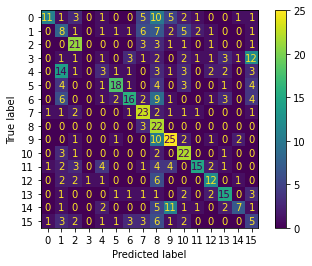

In [9]:
cm_display = ConfusionMatrixDisplay(cm).plot()

# Labelbezeichner: Wordnet

In [10]:
# 1. Load Testset
dt = pd.read_csv(base_path + "/topic_huffpost/wordnet/dev.csv")
labels = dt["label"]
text = dt["text"]

# 2. Load Model
tars = TARSClassifier.load(base_path + "/topic_yin/model/best-model.pt")

# 3. Run Test
results = []
classes = [
    "undertake a journey or trip",
    "the practical application of science to commerce or industry",
    "a healthy state of wellbeing free from disease",
    "an adult female person (as opposed to a man)",
    "a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian",
    "a father or mother; one who begets or one who gives birth to or nurtures and raises a child; a relative who plays the role of guardian",
    "the social event at which the ceremony of marriage is performed",
    "the latest and most admired style in clothes and cosmetics and behavior",
    "an activity that is diverting and that holds the attention",
    "a particular branch of scientific knowledge",
    "the legal dissolution of a marriage",
    "an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law",
    "a strong belief in a supernatural power or powers that control human destiny",
    "an active diversion requiring physical exertion and competition",
    "social relations involving intrigue to gain authority or power",
    "light and humorous drama with a happy ending",
]

for sentence in text:
    try:
    sequence = Sentence(sentence)

    tars.predict_zero_shot(sequence, classes, multi_label=False)
    print(sequence)
    label = sequence.labels[0].value
    results.append(label)
    print(label)

# 4. Evaluate Results
y_true = labels
y_pred = results

report = classification_report(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
fisher = f1_score(y_true, y_pred, average="weighted")

2021-09-08 15:21:36,731 loading file /vol/fob-vol7/nebenf19/samahakk/masterarbeit_experiment2/topic_yin/model/best-model.pt
init TARS
Sentence: "The 15 Greatest Job Titles In The History Of Mankind ( PHOTOS )"   [− Tokens: 13  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.8072)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "Rethinking Values in the Workplace"   [− Tokens: 5  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.8281)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "AT & T 's -- REDACTED -- to the FCC 's Requests about -- REDACTED -- Fiber Optic Deployment -- REDACTED ."   [− Tokens: 22  − Sentence-Labels: {'label': [an act punishable by law; usually considered an e

Sentence: "Companies ' Doing the Right Thing ' -- For Young Employees With Cancer"   [− Tokens: 13  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.9179)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "The Financial Crisis Film ' Boom Bust Boom ' Falls Prey To The Big Problem It Addresses"   [− Tokens: 17  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.8805)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "7 States That Are Running Out Of Water"   [− Tokens: 8  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.9121)]}]
a particular branch of scientific knowledge
Sentence: "What Should HR Leaders Focus On in 2014 ?"   [− Tokens: 9  − Sentence-Labels: {

Sentence: "Reporter ' Erect ' Blooper : 7 News Sydney 's Talitha Cummins' Adorable Freudian Slip ( VIDEO )"   [− Tokens: 18  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.8783)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "Cable News Chyrons Tell The Bizarre Story Of Trump 's First Year In Office"   [− Tokens: 14  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.8853)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "Bill Maher Rips Donald Trump 's Cabinet For ‘ Verbally Fellating’ Their ' Dear Leader '"   [− Tokens: 16  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.9143)]}]
an act punish

Sentence: "Marijuana Laws by State"   [− Tokens: 4  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.8665)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "Oklahoma Woman Beheaded By Fired Coworker : Cops"   [− Tokens: 8  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.8836)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "Lax Supervision Plagued Officer Sex Cases , AP Investigation Finds"   [− Tokens: 10  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.9154)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "Jeremiah Oliver , Mi

Sentence: "Dating Advice For Women Seeing Married Men"   [− Tokens: 7  − Sentence-Labels: {'label': [the social event at which the ceremony of marriage is performed (0.8825)]}]
the social event at which the ceremony of marriage is performed
Sentence: "Divorce And Kids : Why I Love Being A Single Parent"   [− Tokens: 11  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.8062)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "Custody And Its Different Components"   [− Tokens: 5  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.935)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "Pet Reunion Turns Sour : Man Loses Pet Bird In A Case Of Mistaken Identity"   [− Tokens: 15  − Sentence-Lab

Sentence: "Charlize Theron Jokes About Recent Weight Gain During amfAR Gala"   [− Tokens: 10  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.8476)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "Attorney Lisa Bloom Saw Harvey Weinstein As A ' Unique Opportunity ' For Change"   [− Tokens: 14  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.9436)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "All Is Right In The World Because Faye Dunaway Is Still A Huge Diva On Set"   [− Tokens: 16  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.9151)]}]
an act punishable by law; usually considered an evil

Sentence: "Charlie Puth Performs ' See You Again ' In Honor Of Christina Grimmie"   [− Tokens: 13  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.931)]}]
an activity that is diverting and that holds the attention
Sentence: "Patton Oswalt Reveals Wife Michelle McNamara 's Cause Of Death"   [− Tokens: 10  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.8988)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "Miss Piggy Says Her Breakup With Kermit Will Be ' Great For Moi 's Stardom '"   [− Tokens: 16  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.8715)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "Jessica Alba And Chrissy Teigen Are G

Sentence: "9 Reasons Parents Are Thankful For Teachers"   [− Tokens: 7  − Sentence-Labels: {'label': [a strong belief in a supernatural power or powers that control human destiny (0.7733)]}]
a strong belief in a supernatural power or powers that control human destiny
Sentence: "It ’s Just 15 Minutes To A Grown-Up , But Not To Kids"   [− Tokens: 13  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.8993)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "A Lesson From My Grandma In The Miracle Of Life"   [− Tokens: 10  − Sentence-Labels: {'label': [a strong belief in a supernatural power or powers that control human destiny (0.9076)]}]
a strong belief in a supernatural power or powers that control human destiny
Sentence: "A Message For My Little Boy Who Likes To Wear Tutus"   [− Tokens: 11  − Sentence-Labels: {'label': [the social event 

Sentence: "Obamas Celebrate Their Last Thanksgiving At The White House"   [− Tokens: 9  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.8873)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "Democrats Are Not Very Excited About The Future Of Their Party"   [− Tokens: 11  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.8706)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "HuffPost Rise : What You Need To Know On December 30"   [− Tokens: 11  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.9169)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable b

Sentence: "Man Between God and the Devil : Martin Luther and the Reclamation of Halloween"   [− Tokens: 14  − Sentence-Labels: {'label': [a strong belief in a supernatural power or powers that control human destiny (0.9067)]}]
a strong belief in a supernatural power or powers that control human destiny


TypeError: expected string or bytes-like object

In [ ]:
print(report)

In [ ]:
cm_display = ConfusionMatrixDisplay(cm).plot()